In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error, accuracy_score

# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

# Project Steps

* Import & Analyze the Data
* Analyze features & measue feature importance
* Clean up data missing values
* Transform Data
* Build pipeline (-> Transform data, Scale Data )
* GridSearch parametergrid for models
* Validate model
* Test model

# Code

#### Loading Data

In [2]:
original_data = pd.read_csv(r'.\kunskapskontroll_ai2_del1\housing.csv')

#### EDA of Original Data

In [3]:
original_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
original_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


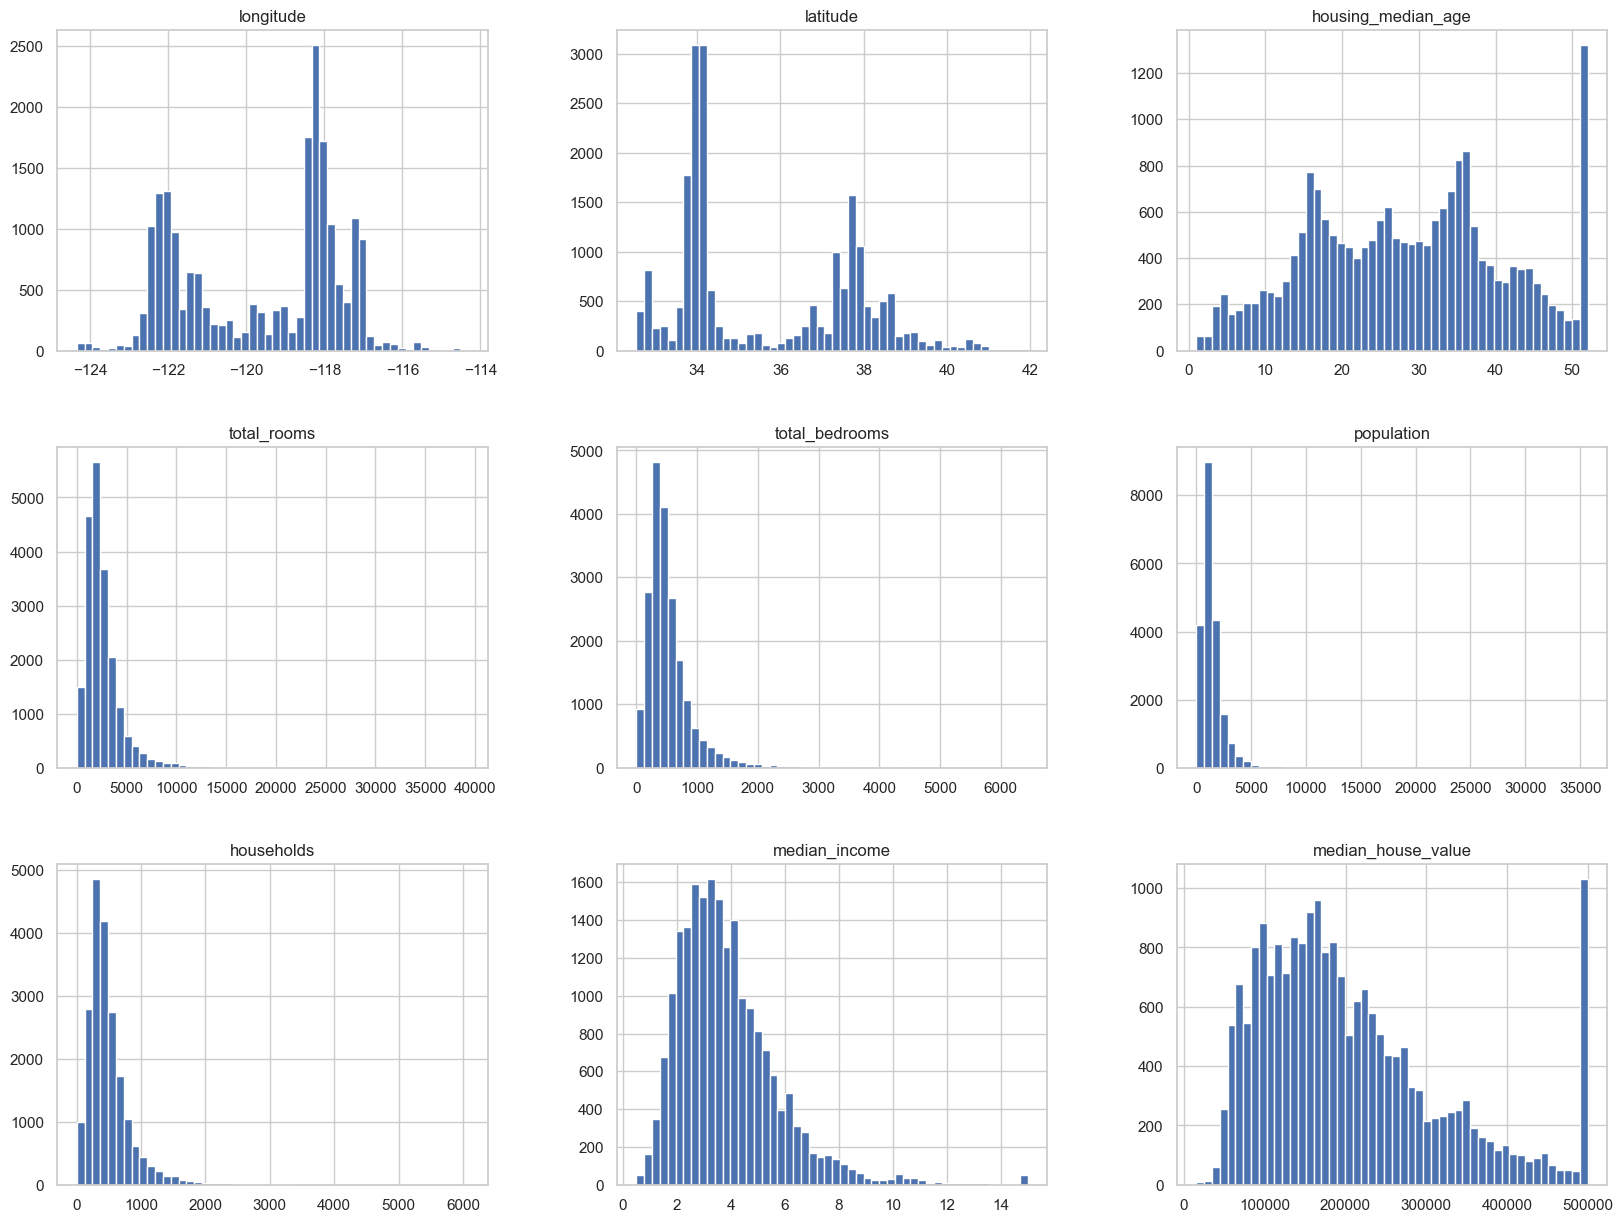

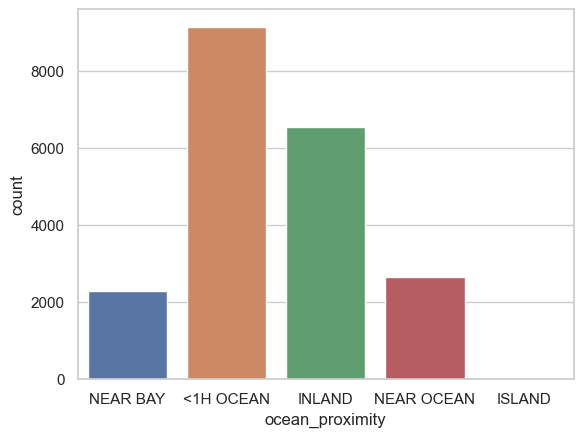

In [5]:
sns.set(style="whitegrid")

# Histograms of Original Data
original_data.hist(bins=50, figsize=(20, 15))
plt.show()

# Bar plot for Ocean Proximity
sns.countplot(x='ocean_proximity', data=original_data)
plt.show()

#### Feature Engineering & Feature Selection

In [6]:
data = original_data

# Creating new feature columns in the Dataset
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']

# Transforming 'ocean_proximity' feature using dummy variable encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], dtype=int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   rooms_per_household         20640 non-null  float64
 10  bedrooms_per_household      20433 non-null  float64
 11  population_per_household    20640 non-null  float64
 12  ocean_proximity_<1H OCEAN   20640 non-null  int32  
 13  ocean_proximity_INLAND      206

In [48]:
# List of features used for the training data:
housing_features = [
    'median_house_value',
    'longitude',
    'latitude',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'population_per_household',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
]
housing = data[housing_features]

## EDA on Transformed Data

#### Checking Missing Values

In [8]:
housing.info()
print('-'*50)

# Checking for missing Values
housing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   median_income               20640 non-null  float64
 4   rooms_per_household         20640 non-null  float64
 5   bedrooms_per_household      20433 non-null  float64
 6   population_per_household    20640 non-null  float64
 7   ocean_proximity_<1H OCEAN   20640 non-null  int32  
 8   ocean_proximity_INLAND      20640 non-null  int32  
 9   ocean_proximity_ISLAND      20640 non-null  int32  
 10  ocean_proximity_NEAR BAY    20640 non-null  int32  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  int32  
 12  median_house_value          20640 non-null  float64
dtypes: float64(8), int32(5)
memory 

longitude                       0
latitude                        0
housing_median_age              0
median_income                   0
rooms_per_household             0
bedrooms_per_household        207
population_per_household        0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
median_house_value              0
dtype: int64

In [9]:
# Drop all null values
## Use Imputer instead
housing.dropna(inplace=True)

housing.isnull().sum()

C:\Users\Holt\AppData\Local\Temp\ipykernel_124040\2617800338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.dropna(inplace=True)


longitude                     0
latitude                      0
housing_median_age            0
median_income                 0
rooms_per_household           0
bedrooms_per_household        0
population_per_household      0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
dtype: int64

#### Correlation Matrix

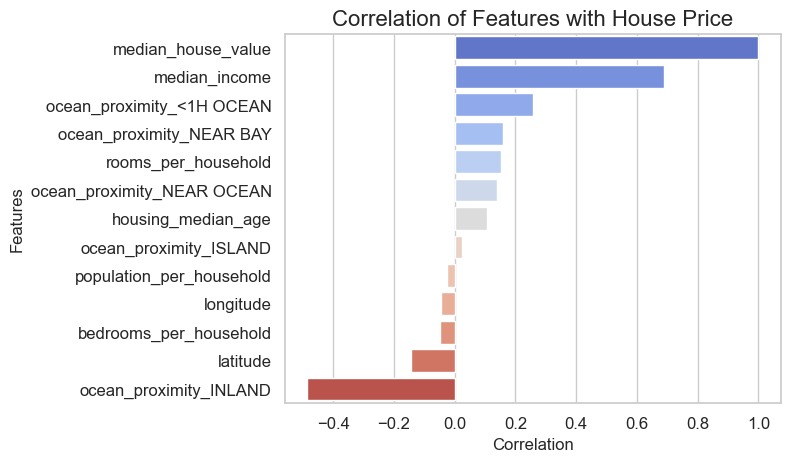

In [10]:
# Visualising Housing dataset Correlation
correlation_matrix = housing.corr()
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
sns.set(style="whitegrid")

# Correlation Barplot
bar_plot = sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")
plt.title("Correlation of Features with House Price")
bar_plot.set_title("Correlation of Features with House Price", fontsize=16)
bar_plot.set_xlabel("Correlation")
bar_plot.set_ylabel("Features")
bar_plot.tick_params(labelsize=12)
plt.show()

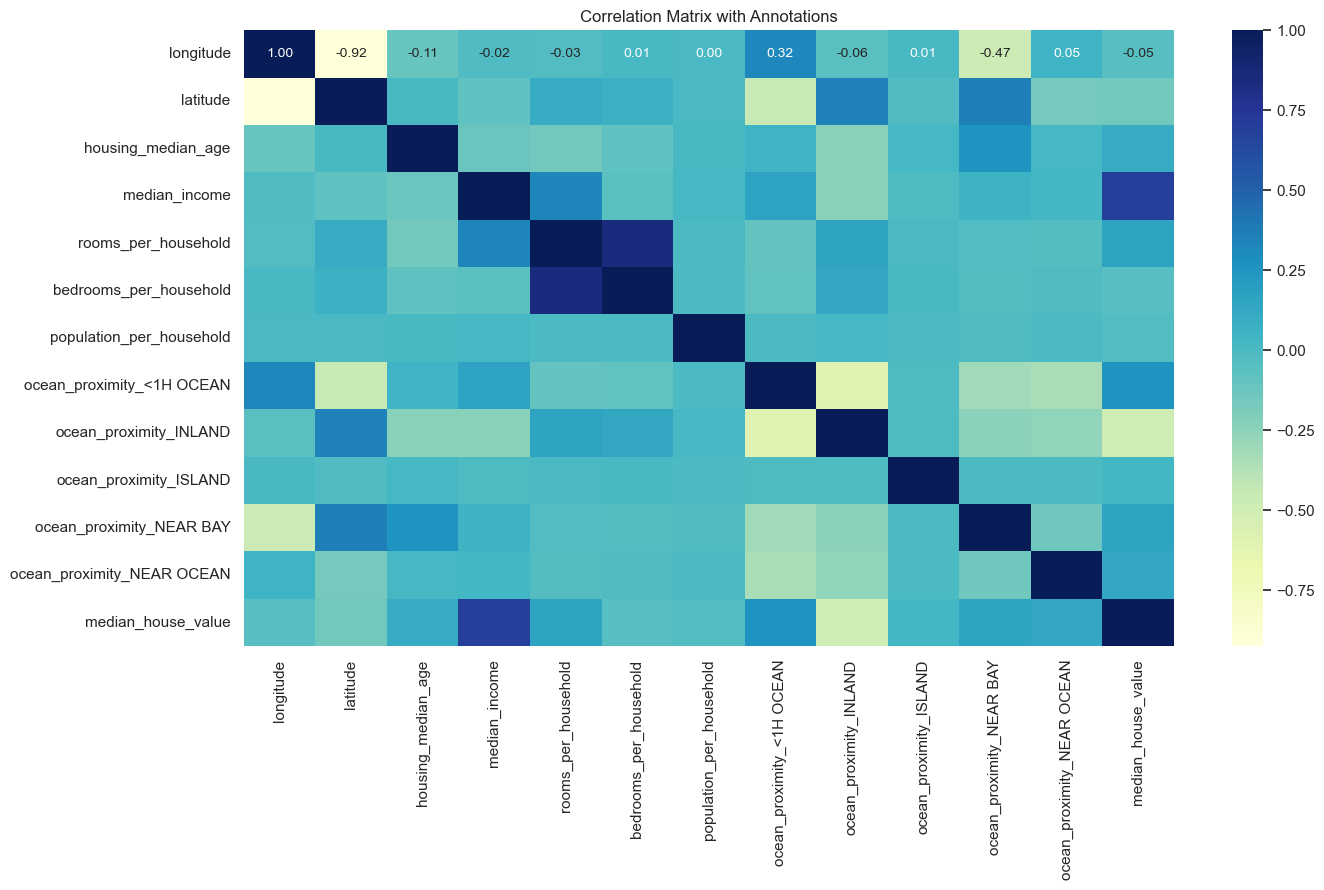

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Matrix with Annotations')
plt.show()

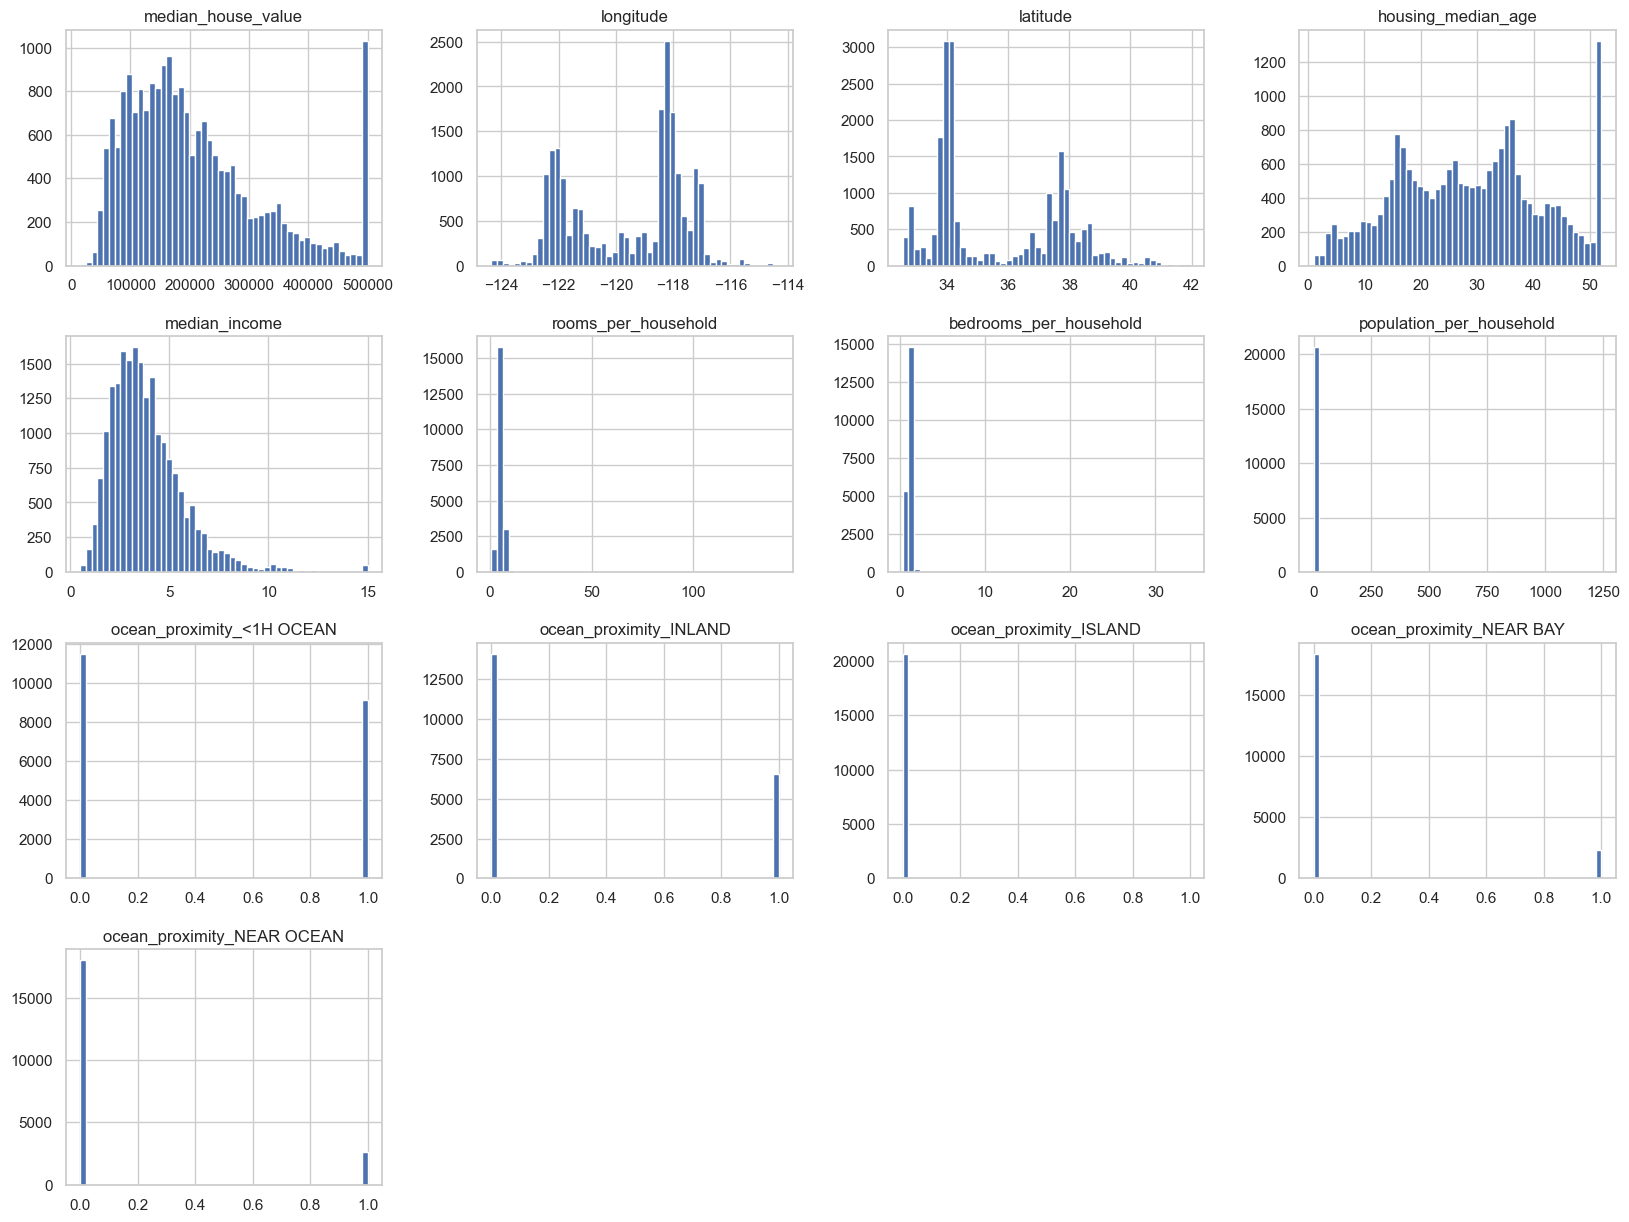

In [51]:
# Histograms
housing.hist(bins=50, figsize=(20, 15))
plt.show()

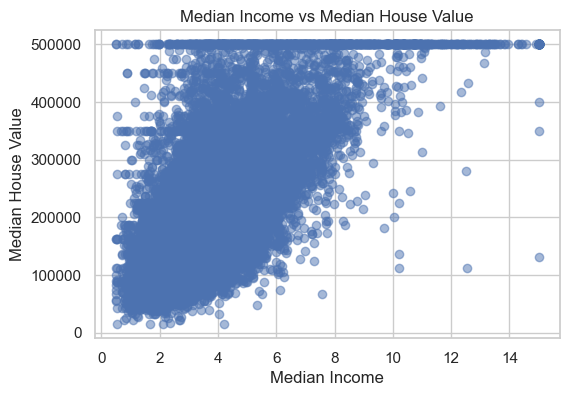

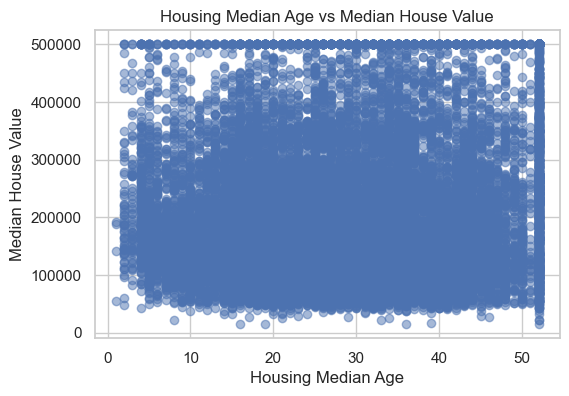

In [86]:
# Income - value
plt.figure(figsize=(6,4))
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Age - Value
plt.figure(figsize=(6,4))
plt.scatter(housing['housing_median_age'], housing['median_house_value'], alpha=0.5)
plt.title('Housing Median Age vs Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()


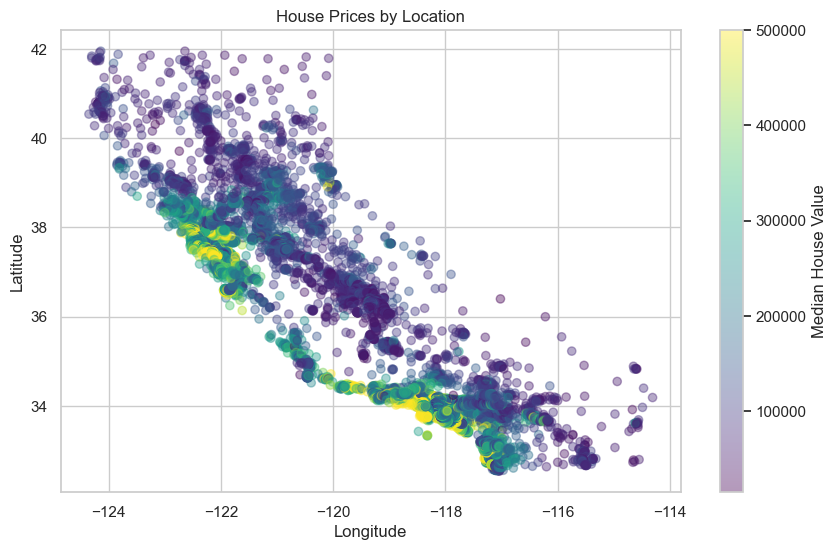

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, c=housing['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

#### Inspecting house median age & house median value capped values

In [88]:
capped_value = 500001
max_age = 52

capped_house_value = housing[housing['median_house_value'] == capped_value]
capped_house_age = housing[housing['housing_median_age'] == max_age]

non_capped_cases = housing[housing['median_house_value'] < capped_value]


print("Capped House Value Cases:\n", capped_house_value[['median_house_value', 'housing_median_age', 'median_income']].head())
print("\nMax House Age Cases:\n", capped_house_age[['median_house_value', 'housing_median_age', 'median_income']].head())

Capped House Value Cases:
      median_house_value  housing_median_age  median_income
89             500001.0                52.0         1.2434
459            500001.0                52.0         1.1696
493            500001.0                52.0         7.8521
494            500001.0                52.0         9.3959
509            500001.0                52.0         7.8772

Max House Age Cases:
    median_house_value  housing_median_age  median_income
2            352100.0                52.0         7.2574
3            341300.0                52.0         5.6431
4            342200.0                52.0         3.8462
5            269700.0                52.0         4.0368
6            299200.0                52.0         3.6591


In [91]:
print("Capped House Value Cases:\n\n", capped_cases.count())

Capped House Value Cases:

 median_house_value            27
longitude                     27
latitude                      27
housing_median_age            27
median_income                 27
rooms_per_household           27
bedrooms_per_household        27
population_per_household      27
ocean_proximity_<1H OCEAN     27
ocean_proximity_INLAND        27
ocean_proximity_ISLAND        27
ocean_proximity_NEAR BAY      27
ocean_proximity_NEAR OCEAN    27
dtype: int64


In [89]:
print('House Value above capped_value:\n',above_capped_value.count())

House Value above capped_value:
 median_house_value            965
longitude                     965
latitude                      965
housing_median_age            965
median_income                 965
rooms_per_household           965
bedrooms_per_household        958
population_per_household      965
ocean_proximity_<1H OCEAN     965
ocean_proximity_INLAND        965
ocean_proximity_ISLAND        965
ocean_proximity_NEAR BAY      965
ocean_proximity_NEAR OCEAN    965
dtype: int64


In [90]:
print('Median House value under capped_value:\n',non_capped_cases.count())

Median House value under capped_value:
 median_house_value            19675
longitude                     19675
latitude                      19675
housing_median_age            19675
median_income                 19675
rooms_per_household           19675
bedrooms_per_household        19475
population_per_household      19675
ocean_proximity_<1H OCEAN     19675
ocean_proximity_INLAND        19675
ocean_proximity_ISLAND        19675
ocean_proximity_NEAR BAY      19675
ocean_proximity_NEAR OCEAN    19675
dtype: int64


## Data Cleanup

## Model

In [20]:
# Defining Median House Value as target variable.
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)
